# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Top 5 Record

In [2]:
df = pd.read_csv("data\stud.csv")
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Last 5 record

In [3]:
df.tail()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [4]:
print(("There are {} rows and {} columns").format({df.shape[0]},{df.shape[1]}))

There are {1000} rows and {8} columns


# Checking Missing Values

In [5]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

note : Hence no missing value

# checking duplicates

In [6]:
df.duplicated().sum()

0

Note : Hence no duplicate values

# Checking data types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


# check the number of unique values of each column

In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

# Checking the statistics of data

In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Mean Scores: The mean (average) scores for math, reading, and writing lie between 66 and 69.

Standard Deviation: The standard deviation, which indicates the spread or variability of the scores, falls between 14.6 and 15.1.

Minimum Scores: The minimum score in math is 0, while the minimum scores in reading and writing are higher, specifically 10 for writing and 17 for reading.

From this information, it seems like the scores in writing and reading are generally higher than the scores in math. This is indicated by the higher minimum scores in writing and reading compared to the minimum score in math. Additionally, the narrow range of mean scores and standard deviations suggests that the scores are relatively concentrated around the mean, and there might not be significant outliers.

# Exploring data

In [10]:
# Defining numerical and categorical columns
numeric_features = [i for i in df.columns if df[i].dtype != 'O']
categorical_features = [i for i in df.columns if df[i].dtype == 'O']

print('There are {} numerical features : {}'.format(len(numeric_features),numeric_features))
print('There are {} categorical features : {}'.format(len(categorical_features),categorical_features))

There are 3 numerical features : ['math_score', 'reading_score', 'writing_score']
There are 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [11]:
# Finding various categories present in different categorical columns
for i in categorical_features:
    print("Categories in--->",i, df[i].unique())


Categories in---> gender ['female' 'male']
Categories in---> race_ethnicity ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in---> parental_level_of_education ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in---> lunch ['standard' 'free/reduced']
Categories in---> test_preparation_course ['none' 'completed']


# Adding new columns "Total_score" and "Average"

In [12]:
df['total_score'] = df['math_score']+df['reading_score']+df['writing_score']
df['average_score'] = df['total_score']/3

In [13]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [14]:
# Finding number of students who scored full marks in each subjects:
math_full = df[df['math_score'] == 100]
reading_full = df[df['reading_score'] == 100]
writing_full = df[df['writing_score'] == 100]
print("Number of students with full marks in Maths",len(math_full))
print("Number of students with full marks in Reading",len(reading_full))
print("Number of students with full marks in Writing",len(writing_full))

Number of students with full marks in Maths 7
Number of students with full marks in Reading 17
Number of students with full marks in Writing 14


In [15]:
# finding number of students who scored less marks
math_less = df[df['math_score'] <= 20]
reading_less = df[df['reading_score'] <= 20]
writing_less = df[df['writing_score'] <= 20]
print("Number of students with less than 20 marks in Maths",len(math_less))
print("Number of students with less than 20 marks in Reading",len(reading_less))
print("Number of students with less than 20 marks in Writing",len(writing_less))

Number of students with less than 20 marks in Maths 4
Number of students with less than 20 marks in Reading 1
Number of students with less than 20 marks in Writing 3


We can observe that students performs worst in maths and best in Reading

In [16]:
#Finding no of students who scored full marks in writng, maths and reading
Full_marks = df[df['total_score']==300]
print("Number of students with full marks",len(Full_marks))

Number of students with full marks 3


# Exploring data

Visualize average score distribution to make some conclusion.


Histogram & Kernel Distribution Function  KDE

<Axes: xlabel='average_score', ylabel='Count'>

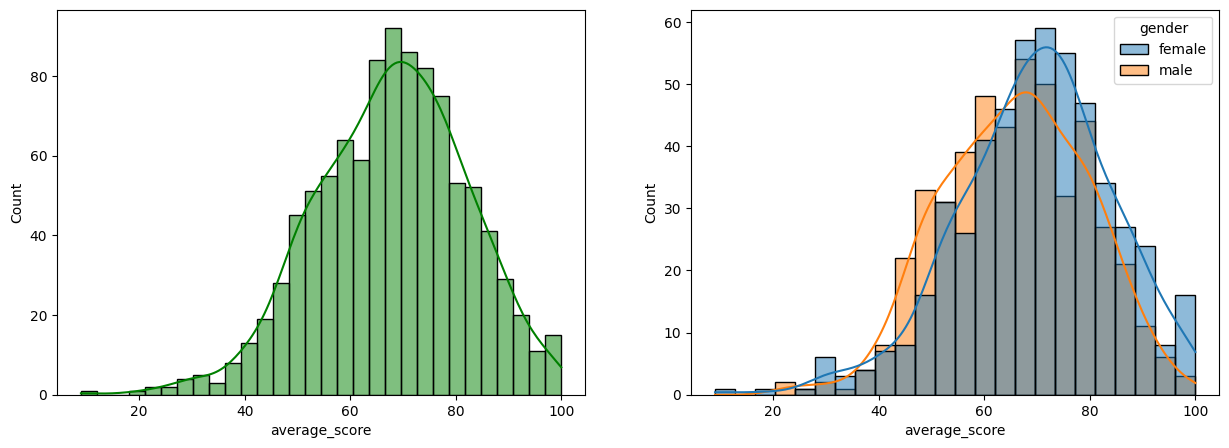

In [32]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
plt.subplot(121)
sns.histplot(data=df,x=df['average_score'],bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x=df['average_score'],kde=True,hue=df['gender'])

<Axes: xlabel='total_score', ylabel='Count'>

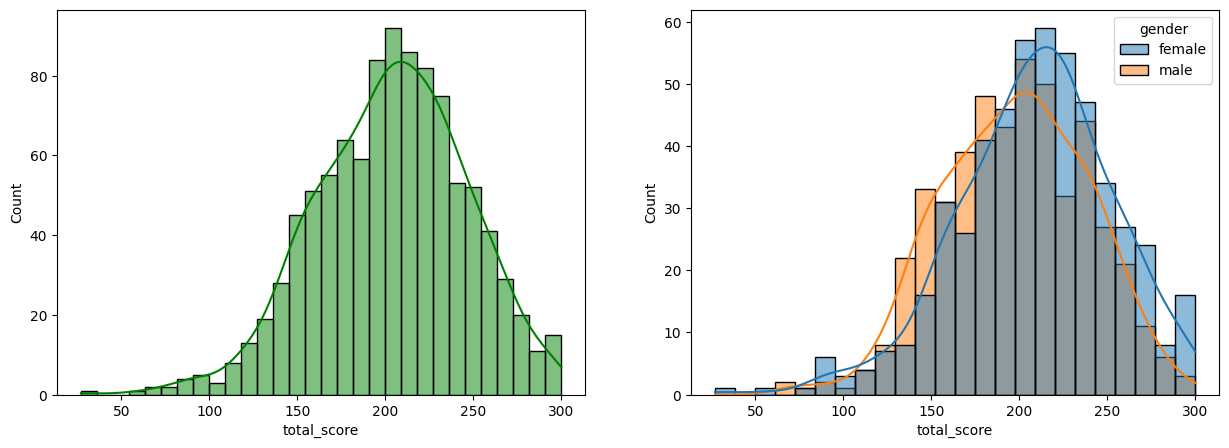

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
plt.subplot(121)
sns.histplot(data = df, x=df['total_score'],kde = True,bins=30,color='g')
plt.subplot(122)
sns.histplot(data=df , x = df['total_score'],kde = True, hue=df['gender'])

Insights

Female Students perform better than male students

<Axes: xlabel='average_score', ylabel='Count'>

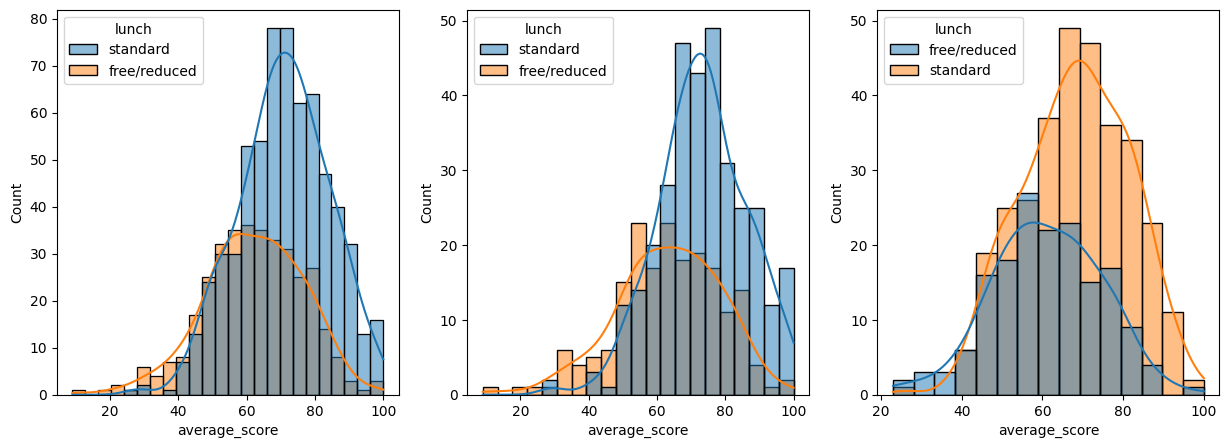

In [50]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
plt.subplot(131)
sns.histplot(data=df , x = 'average_score',hue=df['lunch'],kde=True)
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='lunch')
plt.subplot(1,3,3)
sns.histplot(data = df[df.gender=='male'],x='average_score',kde = True, hue = 'lunch')


Insights

Standard lunch helps to perform well in exams both for males and females

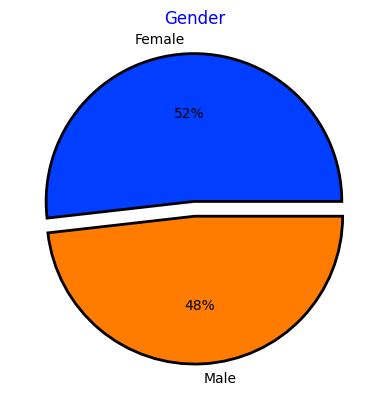

In [97]:
plt.pie(df['gender'].value_counts(),labels=['Female','Male'],autopct='%.0f%%',colors=sns.color_palette('bright'),explode=(0.1,0),wedgeprops = {"edgecolor":"black",
                    'linewidth': 2,
                    'antialiased': True})
plt.title('Gender',color = 'b')
plt.show()

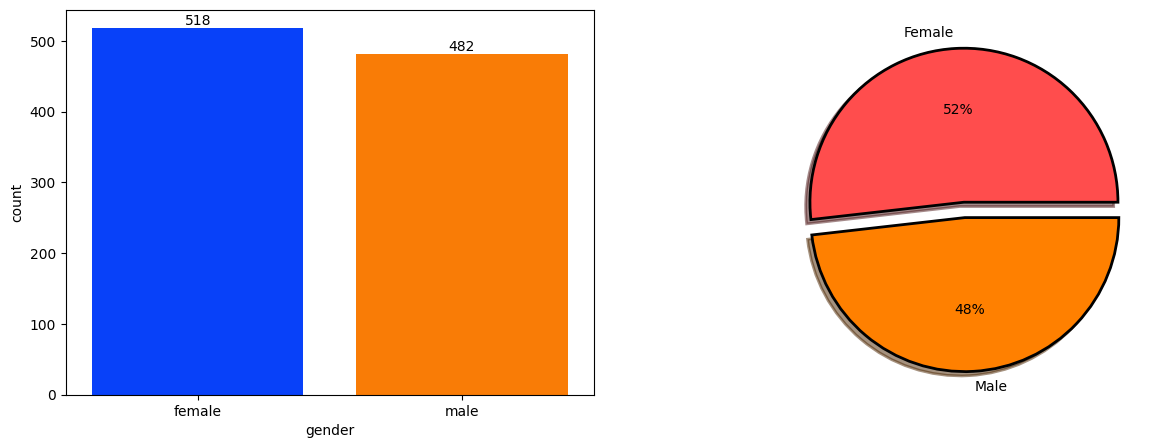

In [105]:
f,ax=plt.subplots(1,2,figsize=(15,5))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=10)
    
plt.pie(x=df['gender'].value_counts(),labels=['Female','Male'],explode=[0,0.1],autopct='%0.f%%',shadow=True,colors=['#ff4d4d','#ff8000'],wedgeprops = {"edgecolor":"black",
                    'linewidth': 2,
                    'antialiased': True})
plt.show()

Gender has balanced data with Females (518) 52% and males (482) 48%.